In [36]:
import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statannot import add_stat_annotation


In [7]:
data_20 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [8]:
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    
    return df

In [9]:
for df in dfs:
    add_vis(df)
    
#     df['inc_class'] = 'low'
#     df.loc[df['DM_inc']>25,'inc_class']= 'high'
    
#     df['sev_class'] = 'low'
#     df.loc[df['DM_severity']>10,'sev_class']= 'high'
    
    df.loc[df['DM_severity']==0,'h_f']= 1
    df.loc[(df['DM_severity']> 0)&(df['DM_severity']<=3),'h_f_sev']=2
    df.loc[(df['DM_severity']> 3)&(df['DM_severity']<=6),'h_f_sev']=3
    df.loc[(df['DM_severity']> 6)&(df['DM_severity']<=12),'h_f_sev']=4
    df.loc[(df['DM_severity']> 12)&(df['DM_severity']<=25),'h_f_sev']=5
    df.loc[(df['DM_severity']> 25)&(df['DM_severity']<=50),'h_f_sev']=6
    df.loc[(df['DM_severity']> 50)&(df['DM_severity']<=75),'h_f_sev']=7
    df.loc[(df['DM_severity']> 75)&(df['DM_severity']<=87),'h_f_sev']=8
    df.loc[(df['DM_severity']> 87)&(df['DM_severity']<=94),'h_f_sev']=9
    df.loc[(df['DM_severity']> 94)&(df['DM_severity']<=97),'h_f_sev']=10
    df.loc[(df['DM_severity']> 97)&(df['DM_severity']<=100),'h_f_sev']=11
    
    
    df.loc[df['DM_inc']==0,'h_f']= 1
    df.loc[(df['DM_inc']> 0)&(df['DM_inc']<=3),'h_f_inc']=2
    df.loc[(df['DM_inc']> 3)&(df['DM_inc']<=6),'h_f_inc']=3
    df.loc[(df['DM_inc']> 6)&(df['DM_inc']<=12),'h_f_inc']=4
    df.loc[(df['DM_inc']> 12)&(df['DM_inc']<=25),'h_f_inc']=5
    df.loc[(df['DM_inc']> 25)&(df['DM_inc']<=50),'h_f_inc']=6
    df.loc[(df['DM_inc']> 50)&(df['DM_inc']<=75),'h_f_inc']=7
    df.loc[(df['DM_inc']> 75)&(df['DM_inc']<=87),'h_f_inc']=8
    df.loc[(df['DM_inc']> 87)&(df['DM_inc']<=94),'h_f_inc']=9
    df.loc[(df['DM_inc']> 94)&(df['DM_inc']<=97),'h_f_inc']=10
    df.loc[(df['DM_inc']> 97)&(df['DM_inc']<=100),'h_f_inc']=11   

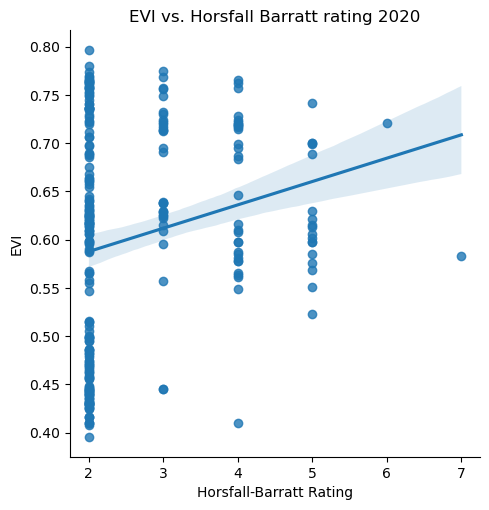

In [31]:
ax = sns.lmplot(data = dfs[0], x='h_f_sev', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating 2020")
plt.show()


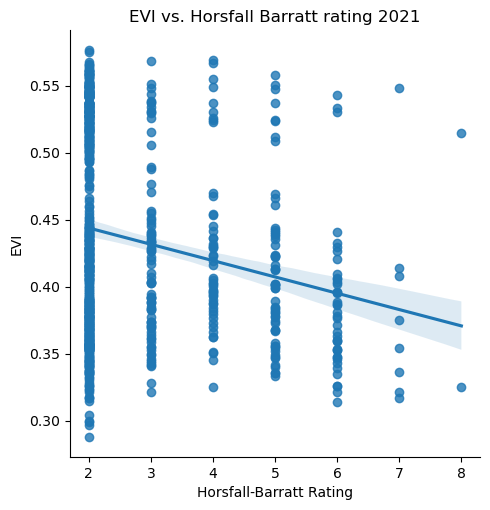

In [32]:
ax = sns.lmplot(data = dfs[1], x='h_f_sev', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating 2021")
plt.show()


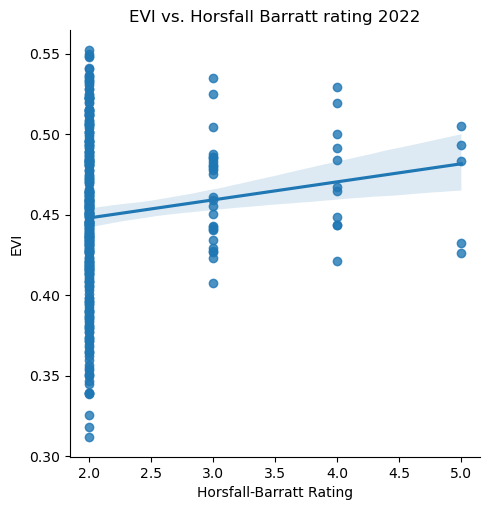

In [33]:
ax = sns.lmplot(data = dfs[2], x='h_f_sev', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating 2022")
plt.show()


[Text(0.5, 0, 'Horsfall-Barratt Rating'),
 Text(0, 0.5, 'EVI'),
 Text(0.5, 1.0, 'EVI vs. Horsfall Barratt rating, severity 2020')]

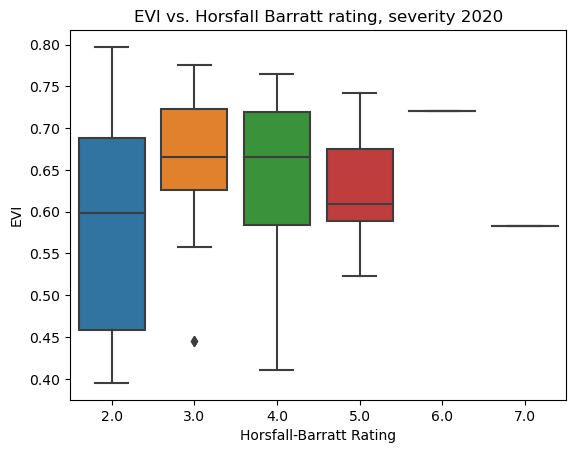

In [64]:
ax = sns.boxplot(data=dfs[0], x='h_f_sev', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating, severity 2020")

# order = [2,3,4,5,6,7]
# pairs = [(2,3), (2,4), (2,5), (2,6), (2,7)]
# add_stat_annotation(ax, data=dfs[0], x='h_f_sev', y='evi', order=order, box_pairs = pairs,
#                      test='Mann-Whitney', loc='inside', verbose=2)

[Text(0.5, 0, 'Horsfall-Barratt Rating'),
 Text(0, 0.5, 'EVI'),
 Text(0.5, 1.0, 'EVI vs. Horsfall Barratt rating, severity 2021')]

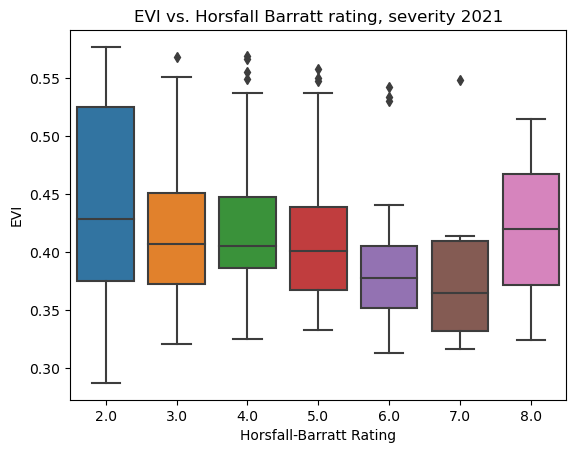

In [65]:
ax = sns.boxplot(data=dfs[1], x='h_f_sev', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating, severity 2021")

# order = [2,3,4,5,6,7,8]
# pairs = [(2,3), (2,4), (2,5), (2,6), (2,7)]
# add_stat_annotation(ax, data=dfs[0], x='h_f_sev', y='evi', order=order, box_pairs = pairs,
#                      test='Mann-Whitney', loc='inside', verbose=2)

[Text(0.5, 0, 'Horsfall-Barratt Rating'),
 Text(0, 0.5, 'EVI'),
 Text(0.5, 1.0, 'EVI vs. Horsfall Barratt rating, Severity 2022')]

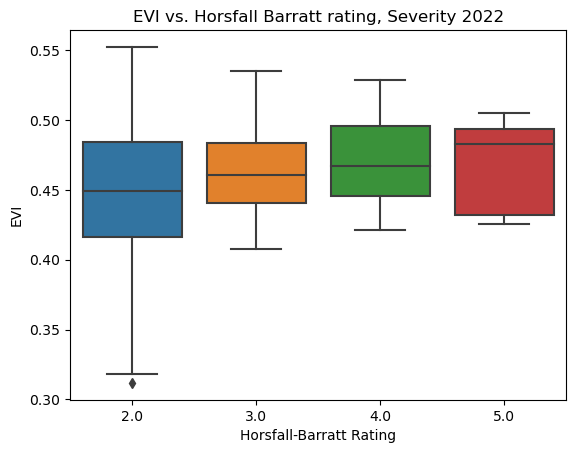

In [66]:
ax = sns.boxplot(data=dfs[2], x='h_f_sev', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating, Severity 2022")

# order = [2,3,4,5,6,7,8]
# pairs = [(2,3), (2,4), (2,5)]
# add_stat_annotation(ax, data=dfs[0], x='h_f_sev', y='evi', order=order, box_pairs = pairs,
#                      test='Mann-Whitney', loc='inside', verbose=2)

[Text(0.5, 0, 'Horsfall-Barratt Rating'),
 Text(0, 0.5, 'EVI'),
 Text(0.5, 1.0, 'EVI vs. Horsfall Barratt rating, Incidence 2020')]

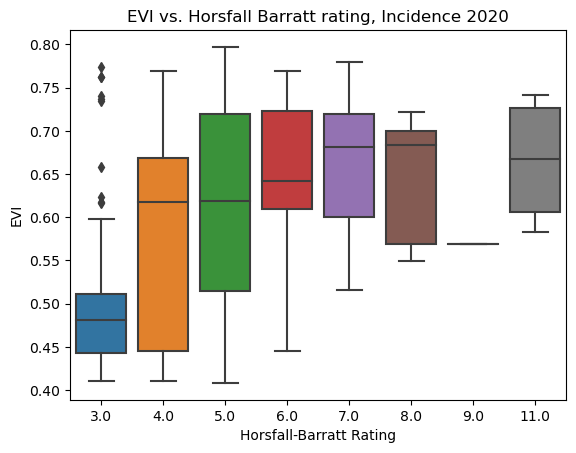

In [67]:
ax = sns.boxplot(data=dfs[0], x='h_f_inc', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating, Incidence 2020")

# order = [3,4,5,6,7,8]
# pairs = [(3,4), (3,5), (3,6), (3,7)]
# add_stat_annotation(ax, data=dfs[0], x='h_f_sev', y='evi', order=order, box_pairs = pairs,
#                      test='Mann-Whitney', loc='inside', verbose=2)

[Text(0.5, 0, 'Horsfall-Barratt Rating'),
 Text(0, 0.5, 'EVI'),
 Text(0.5, 1.0, 'EVI vs. Horsfall Barratt rating, Incidence 2021')]

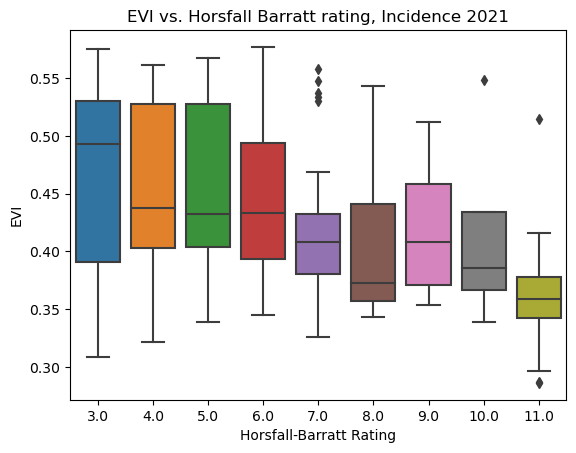

In [68]:
ax = sns.boxplot(data=dfs[1], x='h_f_inc', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating, Incidence 2021")

# order = [3,4,5,6,7,8,9,10,11]
# pairs = [(3,4), (3,5), (3,6), (3,7), (3,11)]
# add_stat_annotation(ax, data=dfs[0], x='h_f_sev', y='evi', order=order, box_pairs = pairs,
#                      test='Mann-Whitney', loc='inside', verbose=2)

[Text(0.5, 0, 'Horsfall-Barratt Rating'),
 Text(0, 0.5, 'EVI'),
 Text(0.5, 1.0, 'EVI vs. Horsfall Barratt rating, Incidence 2022')]

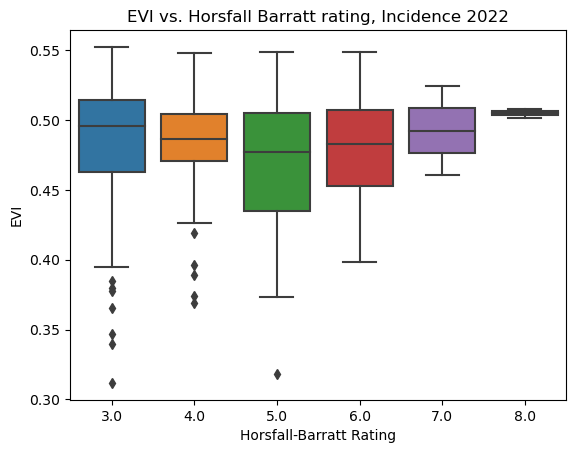

In [69]:
ax= sns.boxplot(data=dfs[2], x='h_f_inc', y='evi')
ax.set(xlabel="Horsfall-Barratt Rating", ylabel='EVI', title= "EVI vs. Horsfall Barratt rating, Incidence 2022")
